# Comparison of the dynamical exponent of MCMC and Wolff algorithms

After these preparations, we are ready to demonstrate the usefulness of the Wolff algorithm: unlike the single site algorithm, which suffers from critical slowing down at the critical temperature, this algorithm can still produce fairly uncorrelated measurements. We derive the dynamical exponents for the 2D and 3D Ising model.

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from ising_common_procedures import *
from scipy.stats import linregress
from tqdm import tqdm
from tqdm import trange

plot_colors=['tab:blue','tab:orange','tab:green','tab:red']
beta_c=np.log(1+np.sqrt(2))/2

In [2]:
def acorr(j,beta,L,warm,meas):
    arr=init_grid((L,L))
    wolff_step(arr,beta,j,warm)
    acc=np.zeros((1,L))
    for i in trange(0,meas):
        wolff_step(arr,beta,j,1)
        if arr[0,0]>0:
            acc+=arr[:,0]
        else:
            acc-=arr[:,0]
    return np.array(acc[0,:]/meas)

100%|██████████| 20000/20000 [00:21<00:00, 934.52it/s] 


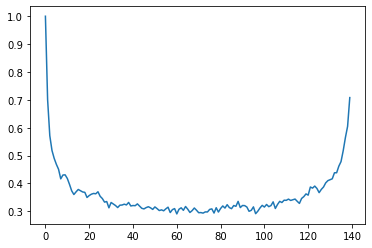

In [237]:
plt.plot(acorr(1,beta_c,140,6000,20000))

In [238]:
spin_autocorr=acorr(1,beta_c,140,6000,20000)

100%|██████████| 20000/20000 [00:21<00:00, 910.20it/s] 


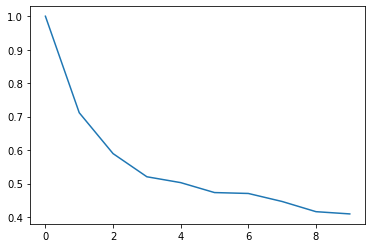

In [250]:
plt.plot(spin_autocorr[:10])

In [251]:
xi=-1/linregress(range(10),\
            np.log(spin_autocorr[:10])).slope
xi

12.178934916477333

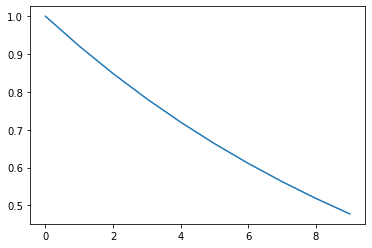

In [252]:
plt.plot([np.exp(-r/xi) for r in range(10)])

100%|██████████| 100000/100000 [00:07<00:00, 13492.08it/s]


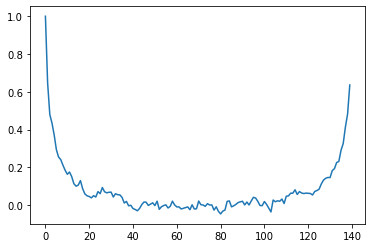

In [42]:
beta=0.4275
acorr_list[beta]=acorr(1,beta,140,6000,100000)
plt.plot(acorr_list[beta])

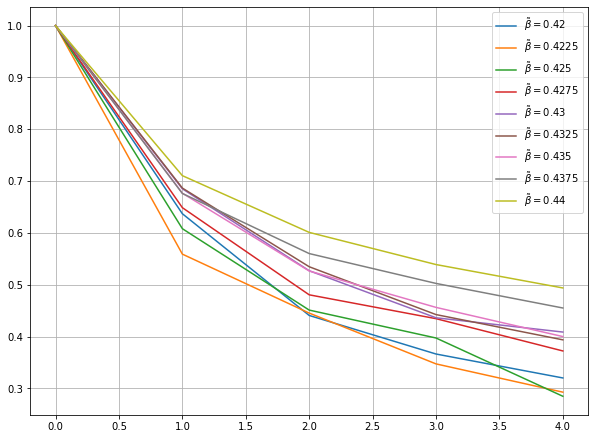

In [46]:
fig, ax=plt.subplots(1,1, figsize=(10,7.5))
for n,val in sorted(acorr_list.items()):
    ax.plot(val[:5],label=r'$\tilde\beta='+f'{n}$')
ax.legend()
ax.grid()

In [3]:
def Gamma(array,t):
    t=abs(t)
    avg=np.average(array)
    s=0
    for i in range(len(array)-t):
        s+=(array[i]-avg)*(array[i+t]-avg)
    s/=(len(array)-t)
    return s

# returns the normalized autocorrelation function for all
# indices in ´values´
def GammaNormalized(array,values):
    gamma0 = Gamma(array,0)
    return [Gamma(array,t)/gamma0 for t in values]

## Finite size scaling for Wolff algorithm

In [12]:
m_acorr={}
# constants
num_warmup=6000
num_meas=10000
j=1
beta=0.4406
# output array for magnetic moment and energy
cluster_result=np.zeros(num_meas)
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
for n in tqdm([30,40,50,60,70,80,90,100,110,120,130,140]):
    arr=init_grid((n,n))
    wolff_step(arr,beta,j,num_warmup)
    wolff_measurement_full(arr, beta, j, cluster_result, m_result,e_result)
    m_acorr[n]=GammaNormalized((e_result),range(10))

 67%|██████▋   | 8/12 [00:50<00:25,  6.33s/it]


KeyboardInterrupt: 

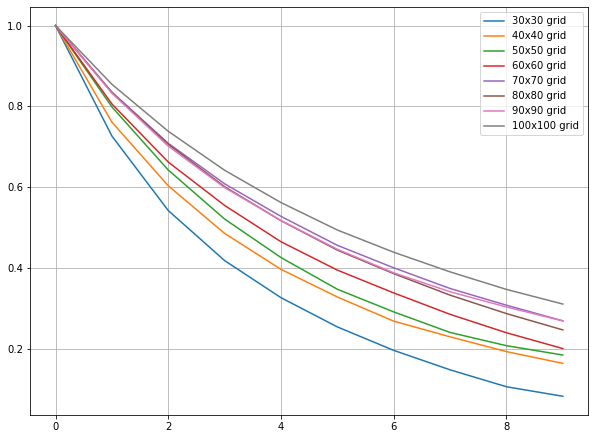

In [13]:
fig, ax=plt.subplots(1,1, figsize=(10,7.5))
for n,val in sorted(m_acorr.items()):
    ax.plot(np.abs(val),label=f'{n}x{n} grid')
ax.legend()
ax.grid()

In [101]:
m_acorr={}
# constants
num_warmup=6000
num_meas=100000
j=1
beta=0.4406
# output array for magnetic moment and energy
cluster_result=np.zeros(num_meas)
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
for n in tqdm([30,40,50,60,70,80,90,100,110,120,130,140]):
    arr=init_grid((n,n))
    wolff_step(arr,beta,j,num_warmup)
    wolff_measurement_full(arr, beta, j, cluster_result, m_result,e_result)
    m_acorr[n]=GammaNormalized(m_result,range(10))

100%|██████████| 12/12 [08:36<00:00, 43.03s/it]


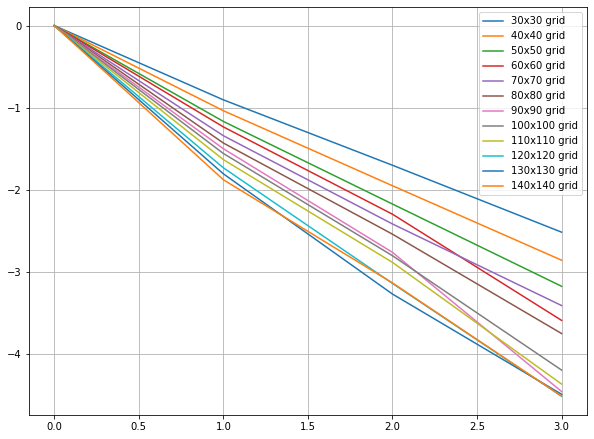

In [122]:
fig, ax=plt.subplots(1,1, figsize=(10,7.5))
for n,val in sorted(m_acorr.items()):
    ax.plot(np.log(np.abs(val[:4])),label=f'{n}x{n} grid')
ax.legend()
ax.grid()

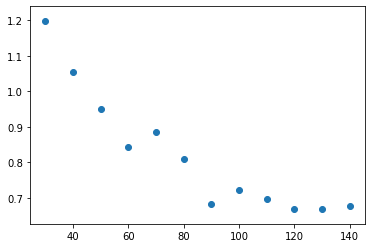

In [125]:
plt.scatter((sorted(m_acorr)),([-1/linregress(range(4),np.log(np.abs(val[:4]))).slope for val in sorted(m_acorr.values())]))

In [107]:
cluster_acorr={}
# constants
num_warmup=6000
num_meas=10000
j=1
beta=0.4406
# output array for magnetic moment and energy
cluster_result=np.zeros(num_meas)
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
for n in tqdm([30,40,50,60,70,80,90,100,110,120,130,140]):
    arr=init_grid((n,n))
    wolff_step(arr,beta,j,num_warmup)
    wolff_measurement_full(arr, beta, j, cluster_result, m_result,e_result)
    cluster_acorr[n]=np.average(cluster_result)

100%|██████████| 12/12 [01:12<00:00,  6.06s/it]


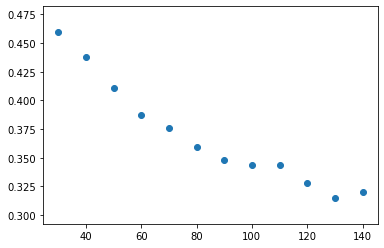

In [109]:
plt.scatter((sorted(m_acorr)),[cluster_acorr[i]/i/i for i in sorted(m_acorr)])

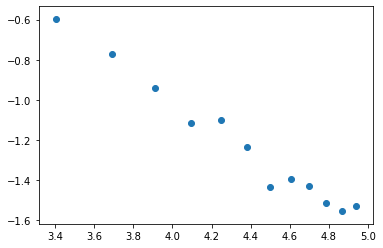

In [128]:
plt.scatter(np.log(sorted(m_acorr)),\
            np.log([-1/linregress(range(4),np.log(np.abs(m_acorr[n][:4]))).slope*(cluster_acorr[n]/n/n) for n in sorted(m_acorr)]))

In [130]:
linregress(np.log(sorted(m_acorr)),\
            np.log([-1/linregress(range(4),np.log(np.abs(m_acorr[n][:4]))).slope*(cluster_acorr[n]/n/n) for n in sorted(m_acorr)])).slope

-0.6424371544179257

## Finite size scaling for Metropolis algorithm

In [131]:
m_acorr_metr={}
# constants
num_warmup=10000
num_meas=10000
j=1
beta=0.4406
# output array for magnetic moment and energy
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
for n in tqdm([30,40,50,60,70,80,90]):
    arr=init_grid((n,n))
    metropolis_hastings_sweep(arr,beta,j,num_warmup)
    metropolis_hastings_measurement(arr, beta, j, m_result,e_result)
    m_acorr_metr[n]=GammaNormalized(m_result,range(10))

100%|██████████| 7/7 [00:51<00:00,  7.35s/it]


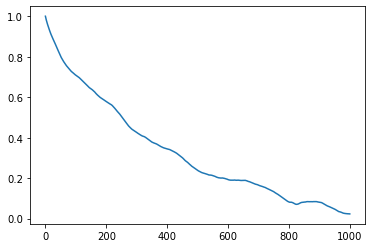

In [138]:
plt.plot(GammaNormalized(m_result,range(1000)))

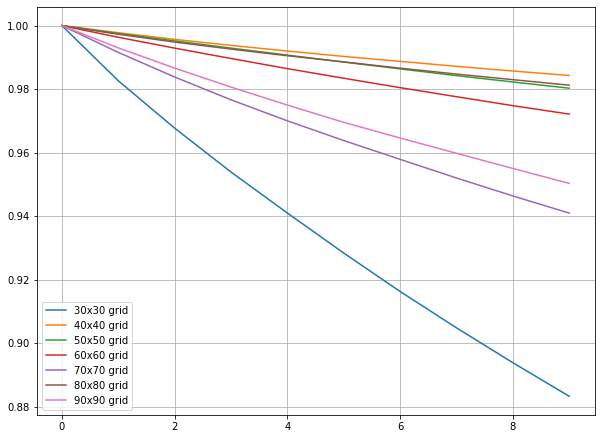

In [133]:
fig, ax=plt.subplots(1,1, figsize=(10,7.5))
for n,val in sorted(m_acorr_metr.items()):
    ax.plot(((val)),label=f'{n}x{n} grid')
ax.legend()
ax.grid()

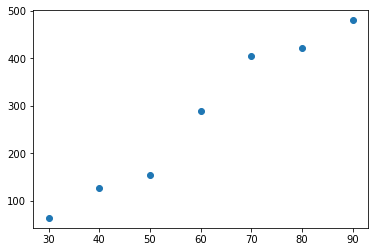

In [142]:
plt.scatter((sorted(m_acorr_metr)),([-1/linregress(range(4),np.log((val[:4]))).slope for val in sorted(m_acorr_metr.values())]))

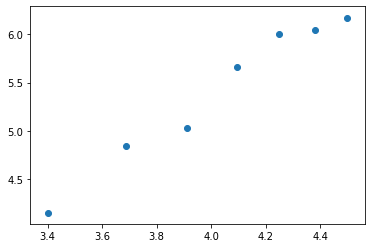

In [147]:
plt.scatter(np.log(sorted(m_acorr_metr)),\
            np.log([-1/linregress(range(4),np.log((val[:4]))).slope for val in sorted(m_acorr_metr.values())]))

In [149]:
linregress(np.log(sorted(m_acorr_metr)),\
            np.log([-1/linregress(range(4),np.log((val[:4]))).slope for val in sorted(m_acorr_metr.values())])).slope

1.9034192431644736

## Susceptibility scaling for the Wolff algorithm

In [45]:
def cumulative_est_var(data):
    mean = data[0]
    M2 = 0
    result = np.zeros(data.shape)
    for count in range(1,data.size):
        delta = data[count] - mean
        mean += delta / (count + 1)
        delta2 = data[count] - mean
        M2 += delta * delta2
        result[count] = M2 / count
    return result

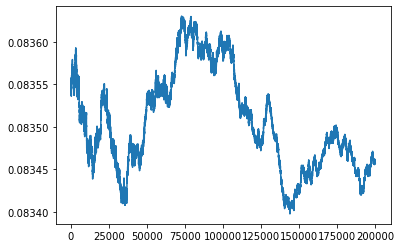

In [235]:
plt.plot(cumulative_est_var(np.random.random(300000))[100000:])

In [83]:
m_acorr={}
# constants
num_warmup=6000
num_meas=100000
j=1
beta=0.4406
# output array for magnetic moment and energy
cluster_result=np.zeros(num_meas)
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
for n in tqdm([30,40,50,60,70]):
    arr=init_grid((n,n))
    wolff_step(arr,beta,j,num_warmup)
    wolff_measurement_full(arr, beta, j, cluster_result, m_result,e_result)
    m_acorr[n]=GammaNormalized(cumulative_est_var(m_result)[num_meas//2:],range(10))

100%|██████████| 5/5 [01:21<00:00, 16.22s/it]


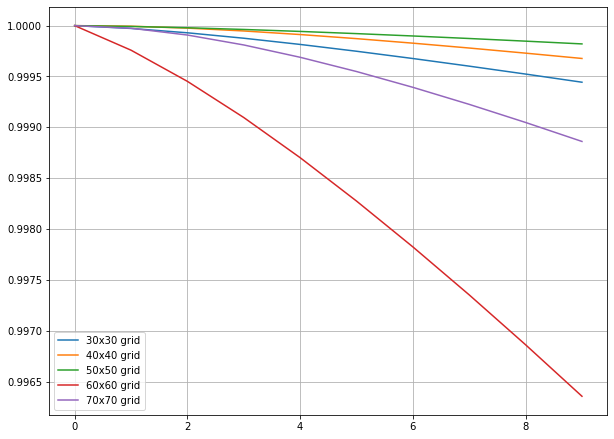

In [84]:
fig, ax=plt.subplots(1,1, figsize=(10,7.5))
for n,val in sorted(m_acorr.items()):
    ax.plot(val,label=f'{n}x{n} grid')
ax.legend()
ax.grid()

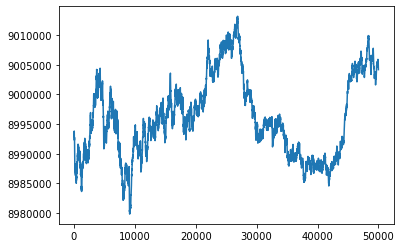

In [85]:
plt.plot(cumulative_est_var(m_result)[num_meas//2:])

## Energy scaling for Wolff algorithm

In [209]:
def save_e_acorr(id_num):
    np.savez(f"simulation_data/energy_autocorrelation_{id_num}_energy_acorr.npz",\
             **{f'L{key}':val for key,val in e_acorr.items()})
    np.savez(f"simulation_data/energy_autocorrelation_{id_num}_cluster_size.npz",\
             **{f'L{key}':val for key,val in cluster_acorr.items()})
def load_e_acorr(id_num):
    global e_acorr, cluster_acorr
    e_acorr={int(key[1:]):val for key,val in\
             np.load(f"simulation_data/energy_autocorrelation_{id_num}_energy_acorr.npz").items()}
    cluster_acorr={int(key[1:]):val for key,val in\
             np.load(f"simulation_data/energy_autocorrelation_{id_num}_cluster_size.npz").items()}

In [184]:
e_acorr={}
cluster_acorr={}
# constants
num_warmup=6000
num_meas=100000
j=1
beta=beta_c
# output array for magnetic moment and energy
cluster_result=np.zeros(num_meas)
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
for n in tqdm([30,40,50,60,70,80,90,100,110,120,130,140]):
    arr=init_grid((n,n))
    wolff_step(arr,beta,j,num_warmup)
    wolff_measurement_full(arr, beta, j, cluster_result, m_result,e_result)
    e_acorr[n]=GammaNormalized((e_result),range(10))
    cluster_acorr[n]=np.average(cluster_result)

100%|██████████| 12/12 [08:39<00:00, 43.32s/it]


In [185]:
save_e_acorr(6)

In [217]:
load_e_acorr(2)

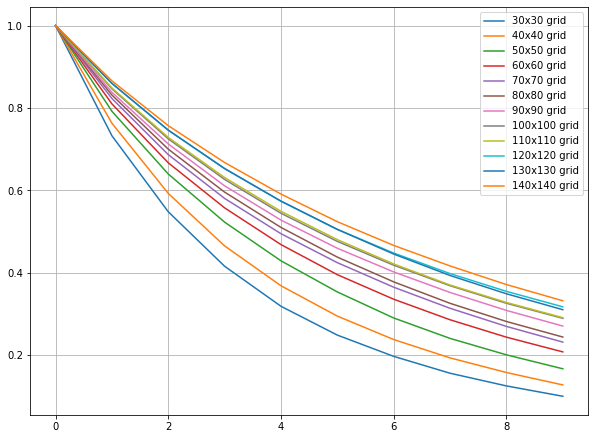

In [218]:
fig, ax=plt.subplots(1,1, figsize=(10,7.5))
for n,val in sorted(e_acorr.items()):
    ax.plot(val,label=f'{n}x{n} grid')
ax.legend()
ax.grid()

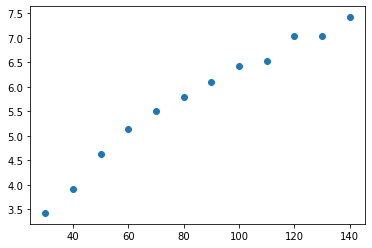

In [219]:
plt.scatter(e_acorr.keys(),([-1/linregress(range(4),np.log(np.abs(val[:4]))).slope for val in e_acorr.values()]))

In [227]:
def wolff_values(e_acorr,cluster_acorr):
    return (list(e_acorr.keys()),\
            [-1/linregress(range(4),np.log(np.abs(e_acorr[n][:4]))).slope*(cluster_acorr[n]/n/n) for n in e_acorr.keys()])
def wolff_log_values(e_acorr,cluster_acorr):
    return (np.log(list(e_acorr.keys())),\
            np.log([-1/linregress(range(4),np.log(np.abs(e_acorr[n][:4]))).slope*(cluster_acorr[n]/n/n) for n in e_acorr.keys()]))

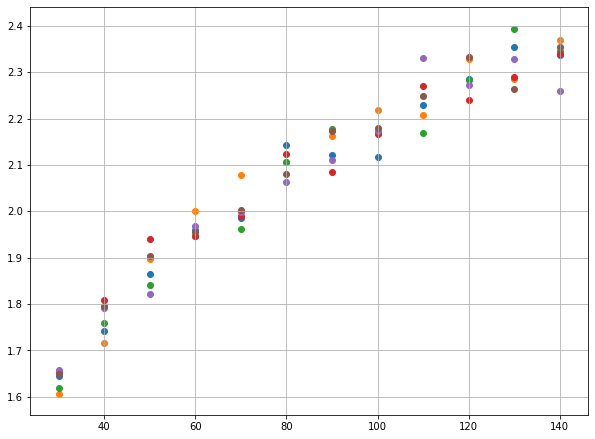

In [228]:
fig, ax=plt.subplots(1,1, figsize=(10,7.5))
for i in range(1,7):
    load_e_acorr(i)
    ax.scatter(*wolff_values(e_acorr,cluster_acorr))
ax.grid()

In [231]:
slopes=[]
for i in range(1,7):
    load_e_acorr(i)
    slopes+=[linregress(*wolff_log_values(e_acorr,cluster_acorr)).slope]
slopes

[0.23367819091856756,
 0.24371844985051733,
 0.24407029713580228,
 0.21164334321417289,
 0.22449976264795213,
 0.22377462002500242]

## Energy scaling for Metropolis algorithm

In [189]:
def save_e_acorr_metr(id_num):
    np.savez(f"simulation_data/energy_autocorrelation_metr_{id_num}_energy_acorr.npz",\
             **{f'L{key}':val for key,val in e_acorr_metr.items()})
def load_e_acorr_metr(id_num):
    global e_acorr_metr
    e_acorr_metr={int(key[1:]):val for key,val in\
             np.load(f"simulation_data/energy_autocorrelation_metr_{id_num}_energy_acorr.npz").items()}

In [196]:
e_acorr_metr={}
# constants
num_warmup=10000
num_meas=10000
j=1
beta=beta_c
# output array for magnetic moment and energy
m_result=np.zeros(num_meas)
e_result=np.zeros(num_meas)
for n in tqdm([30,40,50,60,70,80,90,100,110,120]):
    arr=init_grid((n,n))
    metropolis_hastings_sweep(arr,beta,j,num_warmup)
    metropolis_hastings_measurement(arr, beta, j, m_result,e_result)
    e_acorr_metr[n]=GammaNormalized(e_result,range(10))

100%|██████████| 10/10 [01:55<00:00, 11.57s/it]


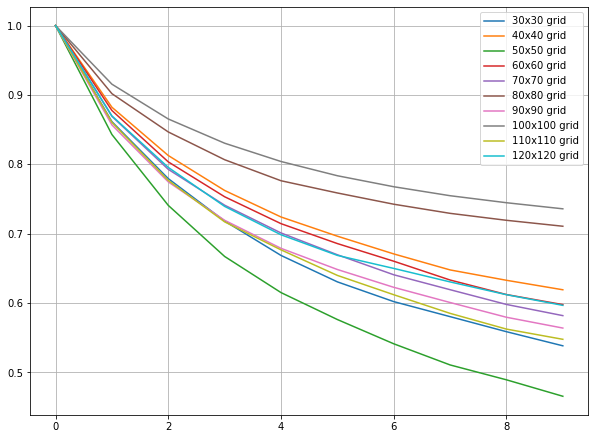

In [197]:
fig, ax=plt.subplots(1,1, figsize=(10,7.5))
for n,val in sorted(e_acorr_metr.items()):
    ax.plot(val,label=f'{n}x{n} grid')
ax.legend()
ax.grid()

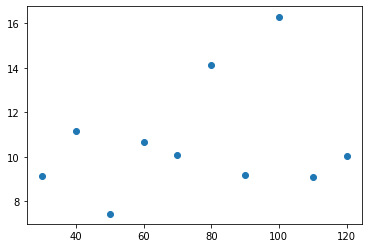

In [202]:
plt.scatter(e_acorr_metr.keys(),([-1/linregress(range(4),np.log(np.abs(val[:4]))).slope for val in e_acorr_metr.values()]))

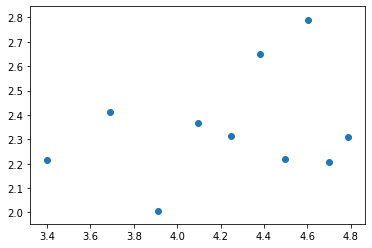

In [207]:
plt.scatter(np.log(list(e_acorr_metr.keys())),\
            np.log([-1/linregress(range(4),np.log((val[:4]))).slope for val in e_acorr_metr.values()]))

In [208]:
linregress(np.log(list(e_acorr_metr.keys())),\
            np.log([-1/linregress(range(4),np.log((val[:4]))).slope for val in e_acorr_metr.values()])).slope

0.14425289992159923